In [41]:
import re  
import pandas as pd
import numpy as np
import tensorflow as tf
from keras_preprocessing import text
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Embedding, GRU, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator

In [42]:
#Load data and create model
vocab_size = 10000
embedding_dim = 128
gru_units = 64
num_classes = 3
max_len = 100
data_path = "data.csv"

In [43]:

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(data)):
  review = re.sub('[^a-zA-Z]', ' ', data['Sentence'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT01\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


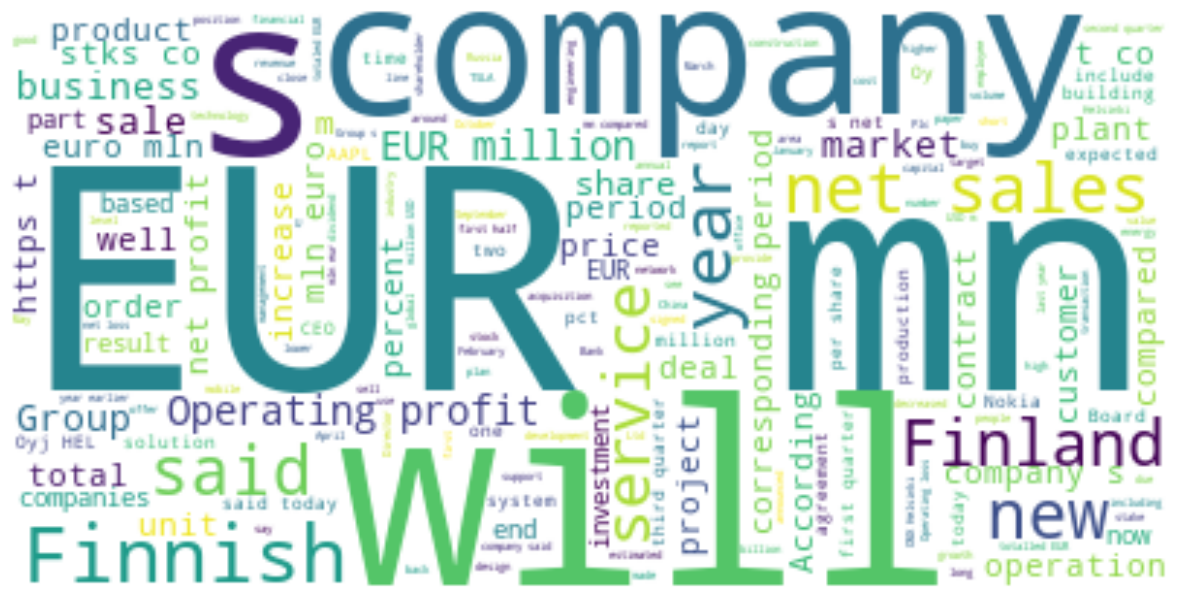

In [44]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
text = " ".join(i for i in data.Sentence)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
data = pd.read_csv('data.csv')
data.head()
data['Sentiment'].value_counts()

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

C:\Users\KIIT01\AppData\Local\Temp\ipykernel_26256\1886965588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Sentiment',data=data,palette ='coolwarm')


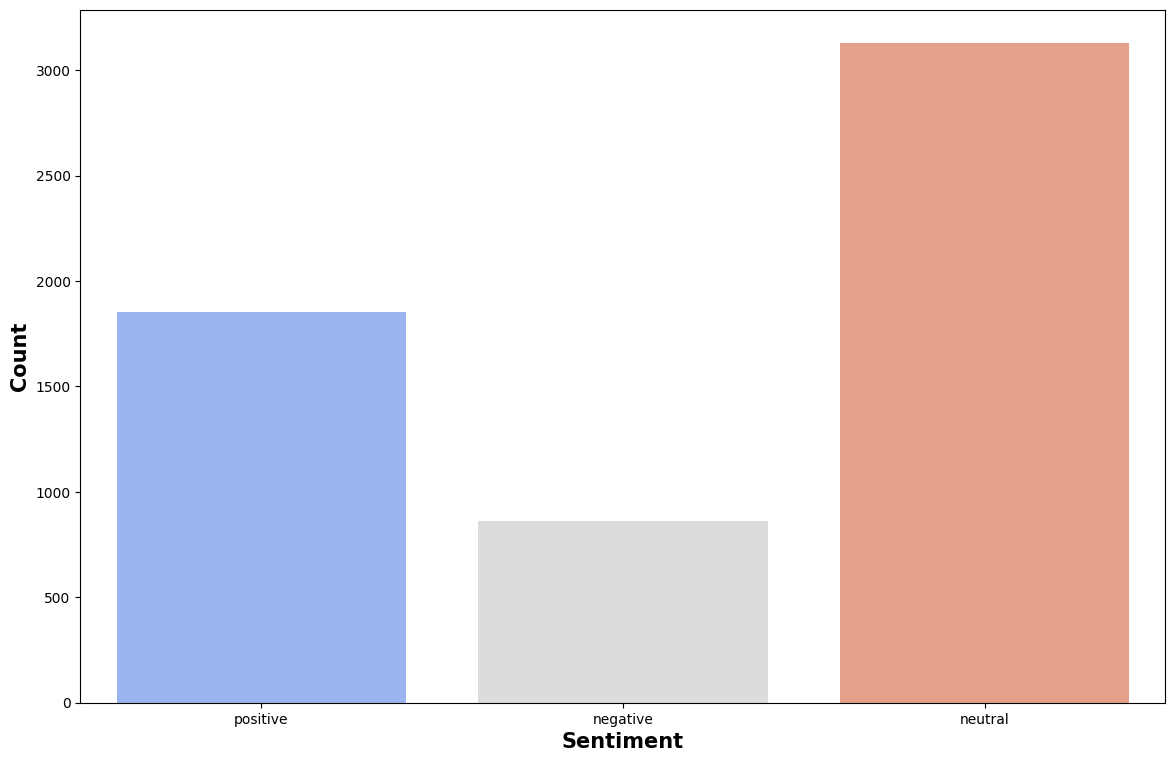

In [46]:
plt.figure(figsize=(14,9))
sns.countplot(x = 'Sentiment',data=data,palette ='coolwarm')
plt.xlabel("Sentiment",fontweight='bold',size=15)
plt.ylabel("Count",fontweight='bold',size=15)
plt.show()

In [47]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data[c1]= label_encoder.fit_transform(data[c1])
    data[c1].unique()
LABEL_ENCODING("Sentiment")
data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",2
3,According to the Finnish-Russian Chamber of Co...,1
4,The Swedish buyout firm has sold its remaining...,1
...,...,...
5837,RISING costs have forced packaging producer Hu...,0
5838,Nordic Walking was first used as a summer trai...,1
5839,"According shipping company Viking Line , the E...",1
5840,"In the building and home improvement trade , s...",1


In [48]:
import re  
import pandas as pd
import numpy as np
import tensorflow as tf
from keras_preprocessing import text
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Embedding, GRU, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator

In [49]:

# Define the text preprocessing function
def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r'[^\w\s]', '', text)  
    return text
# Load and preprocess financial text data
def load_data(data, Sentence, Sentiment):
    data = pd.read_csv('data.csv')
    texts = data['Sentence']
    labels = data['Sentiment']

 # Preprocess text data
    for i in range(len(texts)):
        texts.iloc[i] = preprocess_text(texts.iloc[i])

    # One-hot encode labels
    encoder = OneHotEncoder()
    labels = encoder.fit_transform(labels.values.reshape(-1, 1)).toarray() 
# Tokenize and pad sequence
    vocab_size = 10000   # Define vocabulary size
    max_len = 100      # Define maximum sequence length
    tokenizer = text.Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_len)
    # Split data into training and testing sets
    

    train_padded_sequences, test_padded_sequences, train_labels, test_labels = train_test_split(padded_sequences, labels, test_size=0.2)

    return train_padded_sequences, test_padded_sequences, train_labels, test_labels, tokenizer
# Define the GRU model (with corrected Embedding layer)
def create_model(vocab_size, embedding_dim, gru_units, num_classes):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim))
    model.add(GRU(gru_units))  
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def train_model(model, train_padded_sequences, train_labels, epochs=10):
    model.fit(train_padded_sequences, train_labels, epochs=epochs, validation_split=0.2)
  

  # Existing code for evaluating model on test data...
def evaluate_model(model, test_padded_sequences, test_labels):
    loss, accuracy = model.evaluate(test_padded_sequences, test_labels)
    print(f'Loss: {loss}, Accuracy: {accuracy:.4f}')

def evaluate_model(model, test_padded_sequences, test_labels):
  loss, accuracy = model.evaluate(test_padded_sequences, test_labels)
  
  # Predict labels for test data
  predicted_labels = np.argmax(model.predict(test_padded_sequences), axis=1)

  # Calculate precision
  precision = precision_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')

  print(f'Loss: {loss}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}')
  
def evaluate_model(model, test_padded_sequences, test_labels):
  loss, accuracy = model.evaluate(test_padded_sequences, test_labels)
  
  # Predict labels for test data
  predicted_labels = np.argmax(model.predict(test_padded_sequences), axis=1)

  # Calculate precision and F1 score
  precision = precision_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')
  f1 = f1_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')

  print(f'Loss: {loss}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}')
  
def evaluate_model(model, test_padded_sequences, test_labels):
  loss, accuracy = model.evaluate(test_padded_sequences, test_labels)
  
  # Predict labels for test data
  predicted_labels = np.argmax(model.predict(test_padded_sequences), axis=1)

  # Calculate precision, recall, and F1 score
  precision = precision_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')
  recall = recall_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')
  f1 = f1_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')

  print(f'Loss: {loss}, Accuracy: {accuracy:.4f},\n Precision: {precision:.4f},\n Recall: {recall:.4f},\n F1 Score: {f1:.4f}')



def predict_sentiment(model, tokenizer, text):
    text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)

    prediction = model.predict(padded_sequence)[0]
    predicted_class = np.argmax(prediction)

    sentiment_labels = ['Positive', 'Neutral', 'Negative']  
    sentiment = sentiment_labels[predicted_class]

    return sentiment

 

train_padded_sequences, test_padded_sequences, train_labels, test_labels, tokenizer = load_data(data_path, "Sentence", "Sentiment") 

model = create_model(vocab_size, embedding_dim, gru_units, num_classes)

train_model(model, train_padded_sequences, train_labels, epochs=10)

evaluate_model(model, test_padded_sequences, test_labels)

new_text = "The stock market is booming!"
predicted_sentiment = predict_sentiment(model, tokenizer, new_text)
print(f"Predicted sentiment for '{new_text}': {predicted_sentiment}")

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 0.5526 - loss: 0.9813 - val_accuracy: 0.5936 - val_loss: 0.8968
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - accuracy: 0.7251 - loss: 0.6421 - val_accuracy: 0.6439 - val_loss: 0.8337
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.8692 - loss: 0.3194 - val_accuracy: 0.6406 - val_loss: 0.8898
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - accuracy: 0.9167 - loss: 0.1877 - val_accuracy: 0.6267 - val_loss: 1.1353
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.9308 - loss: 0.1403 - val_accuracy: 0.6353 - val_loss: 1.1993
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - accuracy: 0.9292 - loss: 0.1320 - val_accuracy: 0.6235 - val_loss: 1.3394
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 0.9354 - loss: 0.1082 - val_accuracy: 0.6353 - val_loss: 1.3671
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.9338 - loss: 0.1071 - 

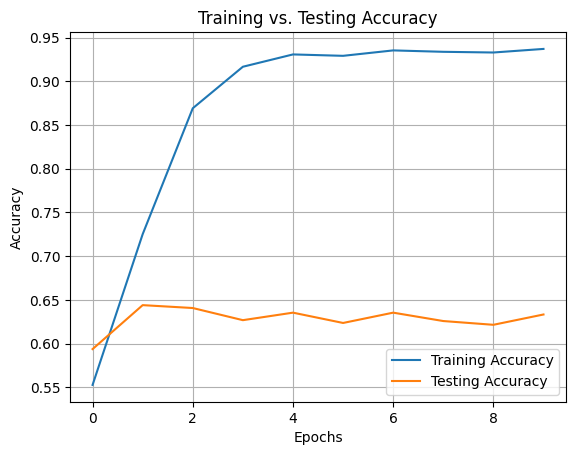

In [53]:
import matplotlib.pyplot as plt

# Replace with your actual training and testing accuracy values
train_acc = [0.5526, 0.7251, 0.8692, 0.9167, 0.9308, 0.9292, 0.9354, 0.9338, 0.9330, 0.9371]
test_acc = [0.5936, 0.6439, 0.6406, 0.6267, 0.6353, 0.6235, 0.6353, 0.6257, 0.6214, 0.6332]
epochs = range(len(train_acc))  # Epochs for the x-axis

# Plot training and testing accuracy
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, test_acc, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()